# Modelling Spatial Deer Distribution using R

This notebook contains **R code** and exercises associated with concepts discussed in lecture and [Millington _et al._ (2010)](http://dx.doi.org/10.1016/j.foreco.2009.12). The notebook _Modelling Spatial Deer Distribution using Python_ provides the same examples but using python code. Compare the two notebooks to understand how the languages differ.

In [1]:
#use install.packages(LIBRARY_NAME) to install, then lines below import

library(ggplot2)    #for nicer plotting
library(caret)      #for cross-validation
library(raster)     #for spatial estimation
library(viridis)    #for plotting palette

Loading required package: lattice

Loading required package: sp

Loading required package: viridisLite



## Section 1: Loading and Checking Data

In [2]:
LOI200 <- read.csv("data/LOI200.csv", header = T) #read the file to a data.frame (assumes data are in same directory as notebook)

Now view the first few lines of the data:

In [3]:
head(LOI200)                                 #view the first part of the data (to check it read properly)

,Site,logDD,DistanceLC,NewDBH,NewBA,SnowDepth,LCProp,Ecoregion,AspenProp,HdwdProp,CountStands
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,<int>
1,2,1.72,0.158,19.9,19.3,238,0.09,1,0,0.77,5
2,3,1.01,0.301,26.8,13.8,223,0.00,1,0,1.00,1
3,4,0.98,0.240,29.5,19.0,163,0.00,1,0,1.00,1
4,5,1.24,0.250,28.5,14.0,176,0.00,1,0,1.00,1
5,6,1.08,0.121,25.6,18.1,152,0.08,1,0,0.92,5
6,7,1.81,0.380,15.6,16.3,179,0.00,1,0,1.00,1


And see a summary of the variables in the data file:

In [4]:
summary(LOI200)                              #view a summary of the data

      Site            logDD         DistanceLC         NewDBH     
 Min.   :   2.0   Min.   :0.330   Min.   :0.0100   Min.   :13.80  
 1st Qu.:  29.5   1st Qu.:0.920   1st Qu.:0.1630   1st Qu.:21.30  
 Median : 837.0   Median :1.170   Median :0.2330   Median :24.90  
 Mean   :1840.7   Mean   :1.150   Mean   :0.2854   Mean   :24.32  
 3rd Qu.:4142.0   3rd Qu.:1.395   3rd Qu.:0.3555   3rd Qu.:27.15  
 Max.   :5342.0   Max.   :1.810   Max.   :0.9300   Max.   :34.50  
     NewBA         SnowDepth         LCProp          Ecoregion   AspenProp     
 Min.   :13.80   Min.   :152.0   Min.   :0.00000   Min.   :1   Min.   :0.0000  
 1st Qu.:18.60   1st Qu.:205.5   1st Qu.:0.00000   1st Qu.:1   1st Qu.:0.0000  
 Median :20.90   Median :233.0   Median :0.00000   Median :1   Median :0.0200  
 Mean   :21.30   Mean   :248.4   Mean   :0.03784   Mean   :2   Mean   :0.1235  
 3rd Qu.:23.45   3rd Qu.:299.0   3rd Qu.:0.01500   3rd Qu.:3   3rd Qu.:0.2000  
 Max.   :29.20   Max.   :372.0   Max.   :0.46000   

Then we use some simple plotting functions to visualise the data:

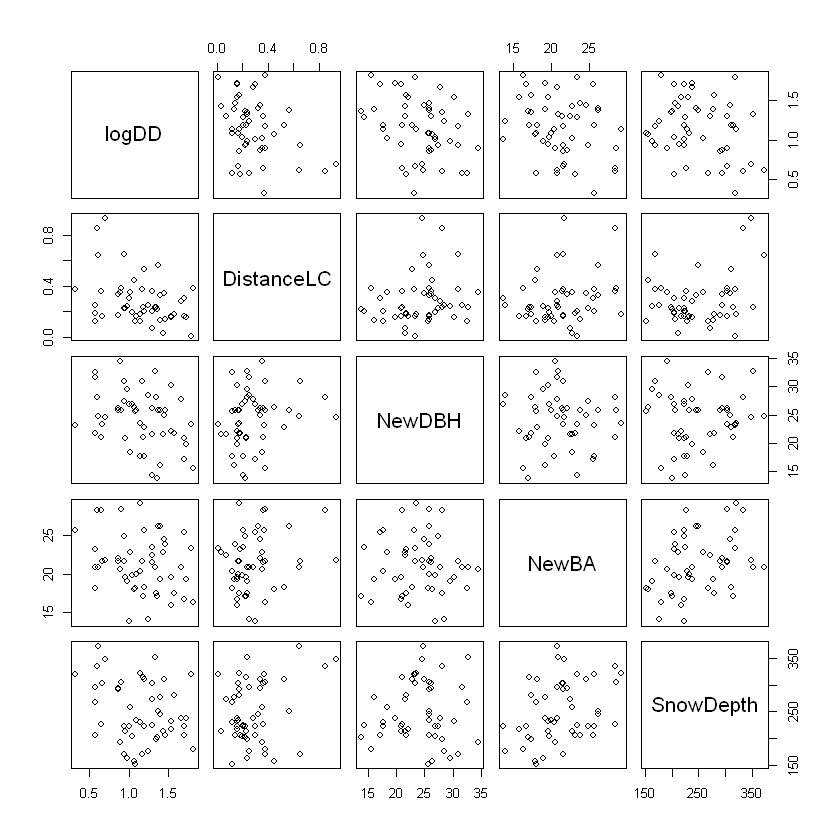

In [5]:
#matrix scatter plot for 2nd to 6th columns (R is 1 indexed!)
pairs(LOI200[,2:6])

In [ ]:
#simple scatter with axis labels
plot(LOI200$DistanceLC, LOI200$logDD, xlab = "Distance LC (km)", ylab = "log(Deer Density)")        

## Section 2: Correlation and Simple Linear Regression

Now that we have familiarised ourselves with the data, we can do some simple correlations to examine the relationship of deer density with the distance to the nearest lowland conifer stand.  

In [ ]:
cor.test(LOI200$DistanceLC, LOI200$logDD, method = "pearson")       #calculate pearson correlation coefficient (r)
cor.test(LOI200$DistanceLC, LOI200$logDD, method = "kendall")       #calculate kendall's correlation coefficient (tau)

We find some weak, but statistically significant (at the 95% confidence level) correlations. 

The next piece of analysis we will do is to fit simple linear regression models to predict log(deer density) from environmental co-variates:

In [ ]:
mod_dlc <- lm(logDD ~ DistanceLC, data = LOI200)       #fit a model and assign to a model object named mod_dlc
summary(mod_dlc)                                       #get the summary of the fitted model

Let's see how this model looks using a scatter plot of the variables and use the fit model (`mod_dlc`) to add a regression line (using the `abline` function) 

In [ ]:
plot(LOI200$DistanceLC, LOI200$logDD)         
abline(mod_dlc)     

The [ggplot2 library in R](https://ggplot2.tidyverse.org/) is similar to the seaborn package in python in that it makes generating nice-looking plots much easier than using the base R functionality. For example, the following code improved the scatter plot above and produces something like seaborn's `regplot`: 

In [ ]:
#requires ggplot2 library
ggplot(LOI200, aes(x=DistanceLC, y=logDD)) +
  geom_point() +
  geom_smooth(method=lm , color="darkblue", fill="lightblue", se=TRUE)

The `names` function is useful in R to check what items we can get from the fitted model:

In [ ]:
names(mod_dlc)                                        

We can see that one of items is the model residuals. We can use this to plot our own histogram of model residuals for example:

In [ ]:
hist(mod_dlc$residuals)                                

This plot shows that the residuals are reasonably normally distributed and that we are likely not violating the assumptions of simple linear regression. 

We can check further assumptions using the built-in diagnostic plotting functions provided in R:

In [ ]:
plot(mod_dlc)            #plot model diagnostics

You can find out more about how to interpret these plots [here](https://analyticspro.org/2016/03/07/r-tutorial-how-to-use-diagnostic-plots-for-regression-models/) (as for our histogram of residuals, these plots show that the assumptions of simple linear regression have been met in this model). 

To get some other useful model outputs, we need to get items from the model summary:

In [ ]:
names(summary(mod_dlc))          #check what items we can get from the SUMMARY of the fitted model

In [ ]:
summary(mod_dlc)$coefficients    #directly access the model coefficients (with t, p)

In [ ]:
summary(mod_dlc)$r.squared       #directly access the r.squared of the model

It's harder to directly access the model p-value, but [it is possible with a function](http://stackoverflow.com/a/5587781).

The code in this section has provided all we need to know to calculate the values in the first row of Table 1 in Millington et al. (2010).

### Task 1.
Use the code above to help you calculate values for the four other variables in Table 1 that have p < 0.1. Check you can get values from your code that correspond to those in Table 1 of Millington _et al._ (2010) 

## Section 3. Multiple linear regression models

Fitting linear regression models with more than one are almost as straighforward as for simple (univariate) linear regression models, we just need to add the additional variables into the model equation. Here's the 'best model' containing two variables:

In [ ]:
mod_dlc_dbh <- lm(logDD ~ DistanceLC + NewDBH, data = LOI200)   #fit a model and assign to a model object
summary(mod_dlc_dbh)       

To get a kendall correlation coefficient we need to output the predicted logDDs and then test using `cor.test` with `method = "kendall"`:

In [ ]:
pred.mod_dlc_dbh <- predict(mod_dlc_dbh)
cor.test(LOI200$logDD, pred.mod_dlc_dbh, method = "kendall")

### Task 2.
Use the code above to write your own code to calculate the values in Table 2 of Millington _et al._ (2010) for the Full Model (all values except for cross-validation)

## Section 4. Cross-validation

To complete the bottom two lines of Table 2 in Millington _et al._ (2010) we need to run cross-validation. In R, we can use functionality in [the `caret` package](https://topepo.github.io/caret/) for cross-validation.

To do a single 5-fold cross validation for the `mod_dlc_dbh` model we would use:

In [ ]:
#requires caret library
#first specify the splitting
fivefold <- trainControl(method="cv", number = 5, savePredictions = T) #savePredictions to create pred below

#then run the cv
set.seed(5)
cv_mod_dlc_dbh <- train(logDD~DistanceLC+NewDBH,data=LOI200, method="lm", trControl=fivefold)

We can see results by accessing `pred` in the caret object created by `train` (see `help(train)` for all the possible outputs).

In [ ]:
cv_mod_dlc_dbh$pred

Now, to get the r2 and tau for these predicted logDD from the cross-validation we use the simple `cor()` function again, passing columns for observed logDD (`obs`) and predicted logDD (`pred`):

In [ ]:
r2obs <- cor.test(LOI200$logDD, pred.mod_dlc_dbh, method = "pearson")$estimate^2  #need to square pearson r to get r2
tauobs <- cor.test(LOI200$logDD, pred.mod_dlc_dbh, method = "kendall")$estimate
print(paste("r2 (obs): ",round(r2obs,3)))
print(paste("tau (obs): ",round(tauobs,3)))

r2cv <- cor.test(cv_mod_dlc_dbh$pred$obs, cv_mod_dlc_dbh$pred$pred, method="pearson")$estimate^2  #need to square pearson r to get r2
taucv <- cor.test(cv_mod_dlc_dbh$pred$obs, cv_mod_dlc_dbh$pred$pred, method="kendall")$estimate
print(paste("r2 (cv): ",round(r2cv,3)))  
print(paste("tau (cv): ",round(taucv,3))) 

But note how the caption of Table 2 in Millington _et al._ (2010) indicates that 
>"estimates for cross-validation results are 95% confidence intervals calculated from mean and variance of 100 repetitions."

To do this we'll create a loop to run the cross-validation multiple times, storing the results so we can calculate the mean and variance:

In [ ]:
cv_r <- vector()       #vector to hold r results for each cross-validation 
cv_t <- vector()       #vector to hold tau results for each cross-validation

for (i in 1:100)
{
  set.seed(i)
  out <- train(logDD~DistanceLC+NewDBH,data=LOI200, method="lm", trControl=fivefold)
  
  #store the correlation results
  cv_r <- c(cv_r, cor.test(out$pred$obs, out$pred$pred, method="pearson")$estimate)
  cv_t <- c(cv_t, cor.test(out$pred$obs, out$pred$pred, method="kendall")$estimate)
}

So, now we can calculate mean and variance for r2 and tau:

In [ ]:
mr <- mean(cv_r^2)
mt <- mean(cv_t)
vr <- 1.96 * var(cv_r^2)   #1.96 for 95% - forgot this in original!
vt <- 1.96 * var(cv_t)     #1.96 for 95% - forgot this in original!

print(round(mr,3))
print(round(mt,3))
print(round(vr,3))
print(round(vt,3))

[NB: Values for error are slightly different from the paper due to randomisation. Also, we don't use the _"repeatedcv"_ option in `trainControl` as that provides model results averaged over all folds, whereas we want to average results over all cross-validations.]

### Task 3.

Build on the code above to calculate the cross-validation values for the 'Full' model

## Section 5. Spatial Estimation
Later in Millington _et al._ (2010) models fit from the sample data (at 51 locations) were used to predict deer density across a subsection of the study area. We can do this in R using the functionality in the `raster` package.

First load a raster map in which the value of each pixel is the distance to the nearest lowland conifer pixel:

In [ ]:
#library(raster)
#library(viridis)

In [ ]:
DistanceLC <- raster("data/LOI200_dlc_km.asc")      #to create the raster object simply provide path to file
plot(DistanceLC)                               #check it looks about right
names(DistanceLC) <- "DistanceLC"              #assign name that matched that used in the regression model for this variable

This first map is all we need to predict deer density based on distance to lowland conifer only we do this using the predict functionality of the raster package to apply the model parameter estimates to the spatial map 

In [ ]:
p_dlc <- predict(DistanceLC, mod_dlc)         #first term is the raster, second is the model we fit above

In [ ]:
plot(p_dlc, col=viridis_pal(option="D")(255))   #use viridis palette to match python output

The map we have made is of log(deer density) - to get to linear deer density we need to raise to power 10:

In [ ]:
plot(10^p_dlc, col=viridis_pal(option="D")(255))

### Task 4.

Use code in this section to create a predicted deer density map for the 'best model' (i.e. using `LOI200_dlc_km.asc` and `LOI200_Meandbh_cm.asc` as predictor maps).

_Hint:_ to predict a model across multiple raster grids you will need to create a [raster stack](https://rspatial.org/raster/spatial/4-rasterdata.html#rasterstack-and-rasterbrick). 

# Additional (not copied in python) 

## Section 6. Map Visualisation

We can make the colours for look like in Millington _et al._ (2010) using functionality in some other packages:

In [ ]:
library(colorspace)  #for heat_hcl
library(rasterVis)  #for rasterTheme
library(lattice)     #for levelplot

myTheme <- rasterTheme(region = heat_hcl(12, c = c(80,30), l = c(30,90), power = c(1/5, 1.5)))   #see https://www.nceas.ucsb.edu/~frazier/RSpatialGuides/colorPaletteCheatsheet.pdf

levelplot(10^p_dlc, par.settings = myTheme, margin = F)

And [we can](http://stackoverflow.com/a/16848471) scale the shades to compare directly between other predictions later:

In [ ]:
levelplot(10^p_dlc, par.settings = myTheme, at=seq(5, 35, length=12), colorkey=list(at=seq(5, 35, length=12)), margin = F)

So far we have a map of predicted deer density across the entire study area. However, sample data were collected only in hardwood stands so really we should only predict for hardwood stands. To do this we need to load a land cover map and then create a 'mask' (a map indicating hardwood pixels only). 

Load a raster map in which each pixel is a categorical land cover:

In [ ]:
LandCov <- raster("data/covtyp_rc.asc")             #simply provide path to file
plot(LandCov)                                  #check it looks about right

The landcov map indicates categories by numbers; we can change this so they are more appropriately represented:

In [ ]:
LandCov <- ratify(LandCov)     #tell R that the landcov raster is categorical                    
rat <- levels(LandCov)[[1]]    #apply the levels (i.e. categories) 
rat$landcover <- c("Aspen", "Lowland Conifer", "Other Decid", "Open", "Other EG", "Hardwood")   #Name the categories Aspen = 1, Lowland Conifer = 2, etc
levels(LandCov) <- rat         #apply the named categories to the raster
plot(LandCov)

Note that the regular raster plot() function still has not picked up the categories. We can plot the categorical map more nicely using functionality in the `rasterVis` package:

In [ ]:
levelplot(LandCov, att = 'landcover', col.regions=c('wheat1', 'orange2', 'darkolivegreen', 'gray', 'wheat2', 'forestgreen'))  #something weired with order of the colours vs levels

Now let's create the hardwood mask:

In [ ]:
hdwd <- raster("data/covtyp_rc.asc")   #simply provide path to file
hdwd[LandCov != 6] <- NA          #if a pixel is not hardwood in LandCov set to NA in hdwd
plot(hdwd)                        #check the mask looks right (compare to the previous map)

Now we can apply the mask to the p_dlc map for all pixels (using the raster `mask()` function)

In [ ]:
p_dlc <- mask(p_dlc, hdwd)    #mask to see prediction for hardwood only

And re-plot to check it worked!

In [ ]:
levelplot(10^p_dlc, par.settings = myTheme, at=seq(5, 35, length=12), colorkey=list(at=seq(5, 35, length=12)), margin = F)

Great, we've created a map of deer density as predicted from distance to nearest lowland conifer what if we wanted to predict using a multivariate model? To do that we need to create raster `stack` of (maps of) our predictor variables.

First load in another predictor map - this one in which the value of each pixel is the mean dbh of the local (200m) region:

In [ ]:
NewDBH <- raster("data/LOI200_Meandbh_cm.asc")      #simply provide file name
plot(NewDBH)                                   #check it looks about right
names(NewDBH) <- "NewDBH"                      #assign name that matched that used in the regression model for this variable

Now create the raster `stack`

In [ ]:
stack_dlc_dbh <- stack(DistanceLC, NewDBH)

To predict using a multivariate model is now just the same as before, except the stack is passed instead of the single raster map:

In [ ]:
p_dlc_dbh <- predict(stack_dlc_dbh, mod_dlc_dbh)

Let's apply the mask then plot it up:

In [ ]:
p_dlc_dbh <- mask(p_dlc_dbh, hdwd)
levelplot(10^p_dlc_dbh, par.settings = myTheme, at=seq(5, 35, length=12), colorkey=list(at=seq(5, 35, length=12)), margin = F)

The plot just created should look pretty similar to Fig 5a in Millington et al. (2010) [although not identical]

Absent from the map we just created is the shading to indicate the location of lowland conifer stands (distance to which is an important predictor in the model). To add this shading first we need to create the shaded layer (similar to creating the `hdwd` object above):

In [ ]:
LC <- raster("data/covtyp_rc.asc")
LC[LandCov != 2] <- NA
LC <- ratify(LC)
LCrat <- levels(LC)[[1]]
LCrat$landcover <- c("Lowland Conifer")
levels(LC) <- LCrat
levelplot(LC, col.regions = c('darkolivegreen'), margin = F, colorkey = F)

To combine layers in a single plot we need to create separate plot objects first:

In [ ]:
LCplot <- levelplot(LC, col.regions = c('darkolivegreen'), margin = F, colorkey = F)
DLCplot <- levelplot(10^p_dlc_dbh, par.settings = myTheme, at=seq(5, 35, length=12), colorkey=list(at=seq(5, 35, length=12)), margin = F)

Then [combine](https://oscarperpinan.github.io/rastervis/#levelplot):

In [ ]:
DLCplot + as.layer(LCplot, under = TRUE)

**Ta-da!**

### Task 5.
Use the `LOI200_dlc_km_scenario.asc` file to produce a predicted deer density map for a scenario in which selected lowland conifer stands have been removed from the landscape (as shown in Fig 6 of Millington _et al._ 2010)

_Hint:_ as in Task 4 you'll need to use a raster stack, but this time using `LOI200_dlc_km_scenario.asc`

## Old Visualisation

The ggplot2 library has made plotting in R much easier. ggplot did not exist when the original analysis for Millington _et al._ (2010) was done and so the plots in the paper look a little different from how they would look if created today using ggplot. Below shows the process used to create Figure 3 in Millington _et al._ (2010) using the base R functionality. 

To plot the model and potentially add 95% confidence bands (the red dotted lines) to our plots we can write a short user-defined function (see below). There's no need to try to understand the guts of how this functions works, but  notice that in the first line of the function definition the function expects to receieve:

1. something called `model`
2. possibly a TRUE/FALSE for `conf.bands`
3. possibly a value for `levels`
4. possibly some other parameters

Argument 1. should be a fitted simple linear regression model (like `mod_dlc`), 2. indicates whether we want confidence bands plotted (default is no bands) and 3. is the level of confidence we want any bands to illustrate (default is 0.95).

In [ ]:
#This function is an edited version of confidence.band function by Derek Young and David Hunter from http://sites.stat.psu.edu/~dhunter/R/confidence.band.r
regression.plot = function(model, conf.bands = FALSE, levels=0.95, segments=50, col.points=palette()[1], 
                           col.line=palette()[1], col.bands=palette()[2], 
                           lty.line=1, lty.bands=2, ...) {
  if (attr(model$terms,"intercept")!=1 || length(model$coef) !=2) {
    stop(paste("regression.plot only works for simple linear regression\n",
               "with one predictor and an intercept"))
  }
  plot(model$model[,2:1], col=col.points, ...)
  abline(model, col=col.line, lty=lty.line, lwd=2)
  if(conf.bands)
  {
    angles=(0:segments)*pi/segments
    halfcircle = cbind(cos(angles), sin(angles))  
    chol.shape = chol(vcov(model))
    slopes = (halfcircle %*% chol.shape)[,2]
    angles = angles+angles[which.max(slopes)]
    halfcircle = cbind(cos(angles), sin(angles))  
    center = model$coef
    radius = sqrt(2*qf(levels, 2, df.residual(model)))
    for (r in radius) {
      for (i in 1:2) {
        halfcircle = -halfcircle
        ellipse = sweep(r*(halfcircle %*% chol.shape), 2, center, "+")
        int = ellipse[,1]
        slope = ellipse[,2]
        x = -diff(int)/diff(slope)
        y = int[-1]+slope[-1]*x
        lines(x, y, lwd=2, lty=lty.bands, col=col.bands)
      }
    }
  }
}

This function is an example of how you can write your own functions just like in other languages (like Python). We can use the function to plot `DistanceLC` against `logDD` with confidence bannds as follows:

In [ ]:
regression.plot(mod_dlc, conf.bands = TRUE)

To create a plot like Figure 3 in Millington _et al._ (2010) we need to tell R to create a plot with two rows of three panes (and reduce the margins) by setting the graphical parameters using `par()`. Any plots we subsequently make will be placed in each of these panes. For example, using a loop that plots `mod_dlc` five times we get:

In [ ]:
default.par <- par()   #save default plotting parameters for later if needed
par(mfrow=c(2,3), mar=c(4,4,2,1))  #now edit the plotting parameters

for(i in 1:5)
{
  regression.plot(mod_dlc, conf.bands = TRUE)
}

NB, plotting like this is made much easier using the [facet](https://ggplot2.tidyverse.org/reference/facet_grid.html) functionality in the [ggplot2 library](https://ggplot2.tidyverse.org/))

To return to the original graphical parameters (i.e. one-pane plots) we can use the `default.par` object we created above (we can check but ignore any error messages):

In [ ]:
par(default.par) 

To check plotting has returned to normal you could re-run the last loop again